# Image Stitching

In [4]:
import numpy as np
from imutils import paths
import imutils
import cv2
import matplotlib.pyplot as plt
from PIL import Image

print('Get all images from ic folder')
image_paths = sorted(list(paths.list_images('ic/')))
images = list()
for path in image_paths:
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    images.append(image)

Get all images from ic folder


Show all images from ic folder



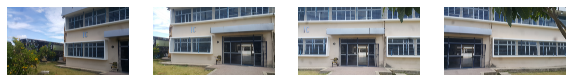

In [5]:
print('Show all images from ic folder\n')
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(1, 4, 1)
plt.axis('off')
plt.imshow(Image.fromarray(images[0]))
fig.add_subplot(1, 4, 2)
plt.axis('off')
plt.imshow(Image.fromarray(images[1]))
fig.add_subplot(1, 4, 3)
plt.axis('off')
plt.imshow(Image.fromarray(images[2]))
fig.add_subplot(1, 4, 4)
plt.axis('off')
plt.imshow(Image.fromarray(images[3]))

In [6]:
print('Stitching images from images loaded')
stitcher = cv2.Stitcher_create()
status, stitched = stitcher.stitch(images)

Stitching images from images loaded


Show stitching images from images loaded:


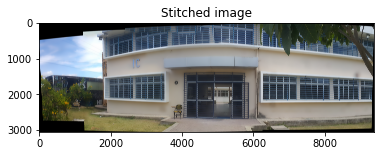

In [7]:
print('Show stitching images from images loaded:')
if status == 0:
    plt.title('Stitched image')
    plt.imshow(Image.fromarray(stitched))
else:
    print(f'Image stitching failed. Error: {status}')

In [9]:
print('Masking the image')
stitched = cv2.copyMakeBorder(stitched, 10, 10, 10, 10, cv2.BORDER_CONSTANT, (0, 0, 0))
gray = cv2.cvtColor(stitched, cv2.COLOR_RGB2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)[1]

Masking the image


Showing threshold area:


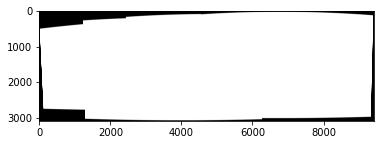

In [10]:
print('Showing threshold area:')
plt.imshow(Image.fromarray(thresh), cmap='gray')

In [12]:
print('Making a border mask: \n')
contours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
c = max(contours, key=cv2.contourArea)
mask = np.zeros(thresh.shape, dtype=np.uint8)
x, y, w, h = cv2.boundingRect(c)
cv2.rectangle(mask, (x, y), (x + w, y + h), 255, -1)

Making a border mask: 



array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

Showing a border mask:


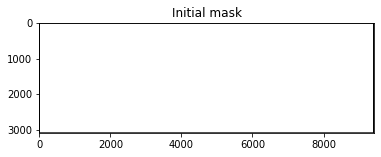

In [13]:
print('Showing a border mask:')
plt.title('Initial mask')
plt.imshow(Image.fromarray(mask), cmap='gray')

In [14]:
print('Adjusting the mask:')
min_rectangle = mask.copy()
sub = mask.copy()

while cv2.countNonZero(sub) > 0:
    min_rectangle = cv2.erode(min_rectangle, None)
    sub = cv2.subtract(min_rectangle, thresh)

Adjusting the mask:


In [17]:
print('Find new contours')
contours = cv2.findContours(min_rectangle.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
c = max(contours, key=cv2.contourArea)
x, y, w, h = cv2.boundingRect(c)
print('Found new contours')

Find new contours
Found new contours


Using the new bounding box 

Image Result: 


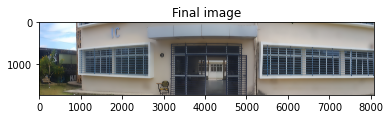

In [18]:
print('Using the new bounding box \n')
stitched = stitched[y:y + h, x:x + w]
print('Image Result: ')
plt.title('Final image')
plt.imshow(Image.fromarray(stitched))

In [19]:
Image.fromarray(stitched).save('ic/stitched.png', format='png')
print('Image result saved')

Image result saved
